# API Test

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '29e3aab2-9137-47c7-8989-eadfe292698b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-12-27T08:44:12.451Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 8948}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10686, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

# Automating the Data Pull

In [3]:
import pandas as pd

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.json_normalize(data['data'])

#Create data timestamp:
df['timestamp'] = pd.to_datetime('now')

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10686,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.958206e+07,1.958206e+07,False,NaN,1,NaN,NaN,None,2023-12-27T08:42:00.000Z,42729.113336,2.748407e+10,11.0999,0.567047,-0.020231,-0.251514,14.273556,25.369274,61.826836,8.367241e+11,50.4617,8.973114e+11,None,2023-12-27T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-27 02:44:30.398671
1,1027,Ethereum,ETH,ethereum,8117,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201843e+08,1.201843e+08,True,NaN,2,NaN,NaN,None,2023-12-27T08:42:00.000Z,2252.231879,9.640045e+09,4.0934,1.047522,0.597107,1.858151,9.878429,25.779995,39.334217,2.706830e+11,16.3245,2.706830e+11,None,2023-12-27T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-27 02:44:30.398671
2,825,Tether USDt,USDT,tether,69773,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,9.134368e+10,9.460306e+10,True,NaN,3,NaN,NaN,None,2023-12-27T08:42:00.000Z,1.000171,5.863820e+10,6.4724,0.007543,0.021299,0.042544,-0.002451,0.012894,0.099889,9.135935e+10,5.5098,9.461928e+10,None,2023-12-27T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-27 02:44:30.398671
3,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.281114e+08,5.657175e+08,True,NaN,4,NaN,NaN,None,2023-12-27T08:42:00.000Z,113.110417,5.279636e+09,-20.0989,0.996754,0.019715,48.416781,101.979657,250.042005,490.563690,4.842386e+10,2.9204,6.398854e+10,None,2023-12-27T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-27 02:44:30.398671
4,1839,BNB,BNB,bnb,1927,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.516933e+08,1.516933e+08,False,NaN,5,NaN,NaN,None,2023-12-27T08:42:00.000Z,295.069026,2.035923e+09,118.5044,-0.115700,6.509596,14.716103,28.602186,29.944376,38.638526,4.475999e+10,2.6994,4.475999e+10,None,2023-12-27T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-27 02:44:30.398671
5,52,XRP,XRP,xrp,1192,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.406502e+10,9.998813e+10,False,NaN,6,NaN,NaN,None,2023-12-27T08:42:00.000Z,0.624251,1.483902e+09,-24.1134,0.258024,0.144081,2.496481,2.702291,14.279549,25.242389,3.375013e+10,2.0354,6.242507e+10,None,2023-12-27T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-27 02:44:30.398671
6,3408,USDC,USDC,usd-coin,15800,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.473143e+10,2.473143e+10,False,NaN,7,NaN,NaN,None,2023-12-27T08:42:00.000Z,1.000165,5.489164e+09,10.7088,0.004839,0.017486,0.006835,0.018145,0.015874,0.018766,2.473550e+10,1.4918,2.473550e+10,None,2023-12-27T08:42:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-12-27 02:44:30.398671
7,2010,Cardano,ADA,cardano,1011,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.535693e+10,3.648438e+10,False,NaN,8,NaN,NaN,None,2023-12-27T08:42:00.000Z,0.604398,8.129632e+08,20.1759,1.174328,-0.019939,2.486440,57.179585,104.928811,147.175489,2.136967e+10,1.2888,2.719792e+10,None,2023-12-27T08:42:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-27 02:44:30.398671
8,5805,Avalanche,AVAX,avalanche,618,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",7.200000

In [6]:
def api_runner():
    
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '29e3aab2-9137-47c7-8989-eadfe292698b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #Keep data in data frame
    df_2 = pd.json_normalize(data['data'])
    df_2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df_2)
    df = pd.concat([df,df_append])
    
    #append data to csv
    #if not os.path.isfile(r'C:\Users\Maj\Desktop\Portfolio\Python\AlexTheAnalystTutorial\api.csv'):
        #df.to_csv(r'C:\Users\Maj\Desktop\Portfolio\Python\AlexTheAnalystTutorial\api.csv', header = 'column_names')
    #else:
        #df.to_csv(r'C:\Users\Maj\Desktop\Portfolio\Python\AlexTheAnalystTutorial\api.csv', mode = 'a', header = False)

In [ ]:
#Read csv file that data was appended to:
#df_3 = pd.read_csv(r'C:\Users\Maj\Desktop\Portfolio\Python\AlexTheAnalystTutorial\api.csv')
#df_3

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed successfully!')
    sleep(60) #sleep for 1 minute
exit()

API runner completed successfully!
API runner completed successfully!


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df

# Transforming the Data

In [23]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [24]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10676,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19579225.00000,19579225.00000,False,NaN,1,NaN,NaN,None,2023-12-24T07:11:00.000Z,43568.59925,14242644483.64601,-24.28900,0.19024,-0.23166,3.85541,16.57959,27.46967,66.81075,853039407720.08032,51.07450,914940584324.54004,None,2023-12-24T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-24 01:22:30.444834
1,1027,Ethereum,ETH,ethereum,8094,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120183778.54751,120183778.54751,True,NaN,2,NaN,NaN,None,2023-12-24T07:11:00.000Z,2292.89029,8654593368.31319,-41.37430,0.44870,-0.09407,3.61714,10.93838,28.19309,45.31322,275568219352.02124,16.49920,275568219352.02002,None,2023-12-24T07:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-24 01:22:30.444834
2,825,Tether USDt,USDT,tether,69534,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,91260809555.42303,93603058351.44896,True,NaN,3,NaN,NaN,None,2023-12-24T07:10:00.000Z,1.00041,40763205093.62770,-15.62500,-0.00880,-0.01943,0.14133,0.02026,0.01955,0.05098,91297890364.13806,5.46630,93641090855.42000,None,2023-12-24T07:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-12-24 01:22:30.444834
3,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,427475878.68483,565552431.18738,True,NaN,4,NaN,NaN,None,2023-12-24T07:10:00.000Z,112.74619,5716001832.60804,43.27110,0.51553,16.81340,54.42385,98.40368,256.19330,480.45302,48196275717.54601,2.88570,63763880643.03000,None,2023-12-24T07:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-24 01:22:30.444834
4,1839,BNB,BNB,bnb,1912,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151693907.15688,151693907.15688,False,NaN,5,NaN,NaN,None,2023-12-24T07:10:00.000Z,268.48050,722634396.25846,-21.61650,0.24315,0.43017,11.39363,14.34638,18.48188,28.38580,40726855365.43670,2.43850,40726855365.44000,None,2023-12-24T07:10:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-24 01:22:30.444834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,6636,Polkadot,DOT,polkadot-new,651,2020-08-19T00:00:00.000Z,"[substrate, polkadot, binance-chain, polkadot-...",NaN,1265011483.01088,1391771964.71923,True,NaN,11,NaN,NaN,None,2023-12-24T07:44:00.000Z,8.54239,743536859.28216,87.57730,1.38590,10.86582,21.89715,64.74989,103.90589,111.14603,10806220754.70650,0.64570,11889058157.14000,None,2023-12-24T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-24 01:46:22.768925
11,1958,TRON,TRX,tron,893,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, dwf-labs-por...",NaN,88364141500.08762,88364175448.90887,True,NaN,12,71659659264.00000,7611937478.39747,None,2023-12-24T07:44:00.000Z,0.10622,209665980.02549,7.29580,0.06580,1.41191,3.96842,3.66155,14.56429,26.02267,9386345502.32703,0.56080,9386349108.49000,None,2023-12-24T07:44:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-12-24 01:46:22.768925
12,1975,Chainlink,LINK,chainlink,1527,2017-09-20T00:00:00.000Z,"[platform, defi, oracles, smart-contracts, sub...",1000000000.00000,568099970.45279,1000000000.00000,False,NaN,13,NaN,NaN,None,2023-12-24T07:44:00.000Z,15.49330,607833149.78300,28.95620,0.09417,2.8

In [25]:
df_4 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

df_4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.16906,-0.02122,4.10555,16.55551,28.61930,66.89317
Ethereum,0.07473,0.06862,3.70213,10.70663,29.19756,45.16613
Tether USDt,0.00579,-0.01392,0.14659,0.03797,0.02746,0.07211
Solana,1.26213,18.34660,56.23191,99.27452,264.18854,485.15534
BNB,0.21128,0.80027,11.78734,14.43571,19.19666,28.61743
XRP,0.20284,-0.08047,0.05062,-0.81470,12.55195,24.77467
USDC,0.00134,0.00027,0.00955,0.01126,-0.00672,0.01033
Cardano,0.01206,0.97946,2.23594,56.11006,118.18066,149.58980
Avalanche,0.99170,4.51174,13.21657,129.82275,357.06877,436.38039


In [26]:
df_5 = df_4.stack()

df_5

name                                 
Bitcoin  quote.USD.percent_change_1h     0.16906
         quote.USD.percent_change_24h   -0.02122
         quote.USD.percent_change_7d     4.10555
         quote.USD.percent_change_30d   16.55551
         quote.USD.percent_change_60d   28.61930
                                          ...   
Toncoin  quote.USD.percent_change_24h   -1.34814
         quote.USD.percent_change_7d     1.37168
         quote.USD.percent_change_30d   -8.67432
         quote.USD.percent_change_60d    3.85532
         quote.USD.percent_change_90d    1.21365
Length: 90, dtype: float64

In [27]:
type(df_4)

pandas.core.frame.DataFrame

In [28]:
type(df_5)

pandas.core.series.Series

In [30]:
df_6 = df_5.to_frame(name = 'values')

df_6

values
name                                         
Bitcoin quote.USD.percent_change_1h   0.16906
        quote.USD.percent_change_24h -0.02122
        quote.USD.percent_change_7d   4.10555
        quote.USD.percent_change_30d 16.55551
        quote.USD.percent_change_60d 28.61930
...                                       ...
Toncoin quote.USD.percent_change_24h -1.34814
        quote.USD.percent_change_7d   1.37168
        quote.USD.percent_change_30d -8.67432
        quote.USD.percent_change_60d  3.85532
        quote.USD.percent_change_90d  1.21365

[90 rows x 1 columns]

In [31]:
type(df_6)

pandas.core.frame.DataFrame

In [32]:
df_6.count()

values    90
dtype: int64

In [34]:
index = pd.Index(range(90))

#df_7 = df_6.set_index(index)
df_7 = df_6.reset_index()

df_7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.16906
1,Bitcoin,quote.USD.percent_change_24h,-0.02122
2,Bitcoin,quote.USD.percent_change_7d,4.10555
3,Bitcoin,quote.USD.percent_change_30d,16.55551
4,Bitcoin,quote.USD.percent_change_60d,28.61930
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-1.34814
86,Toncoin,quote.USD.percent_change_7d,1.37168
87,Toncoin,quote.USD.percent_change_30d,-8.67432
88,Toncoin,quote.USD.percent_change_60d,3.85532


In [37]:
#Rename column:
df_8 = df_7.rename(columns = {'level_1': 'percent_change'})

df_8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.16906
1,Bitcoin,quote.USD.percent_change_24h,-0.02122
2,Bitcoin,quote.USD.percent_change_7d,4.10555
3,Bitcoin,quote.USD.percent_change_30d,16.55551
4,Bitcoin,quote.USD.percent_change_60d,28.61930
...,...,...,...
85,Toncoin,quote.USD.percent_change_24h,-1.34814
86,Toncoin,quote.USD.percent_change_7d,1.37168
87,Toncoin,quote.USD.percent_change_30d,-8.67432
88,Toncoin,quote.USD.percent_change_60d,3.85532


In [41]:
#Change column names:
df_8['percent_change'] = df_8['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])

df_8

,name,percent_change,values
0,Bitcoin,1h,0.16906
1,Bitcoin,24h,-0.02122
2,Bitcoin,7d,4.10555
3,Bitcoin,30d,16.55551
4,Bitcoin,60d,28.61930
...,...,...,...
85,Toncoin,24h,-1.34814
86,Toncoin,7d,1.37168
87,Toncoin,30d,-8.67432
88,Toncoin,60d,3.85532


# Visualizing the Data

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Maj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


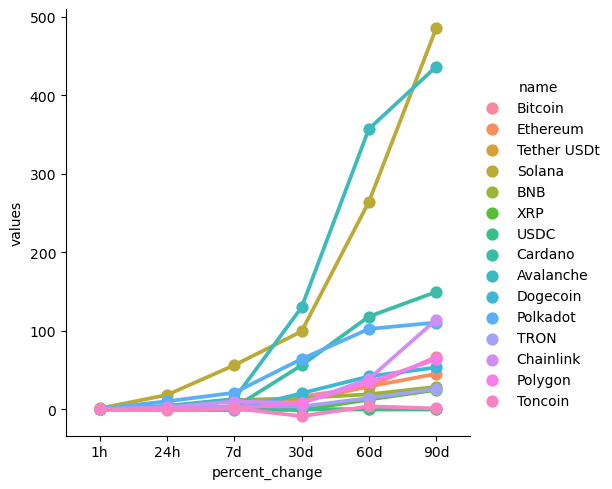

In [42]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df_8, kind = 'point')

In [44]:
#Query the dataset:
df_9 = df[['name','quote.USD.price','timestamp']]

df_9 = df_9.query("name == 'Bitcoin'")

df_9

,name,quote.USD.price,timestamp
0,Bitcoin,43568.59925,2023-12-24 01:22:30.444834
0,Bitcoin,43596.74694,2023-12-24 01:43:19.253561
0,Bitcoin,43625.95265,2023-12-24 01:44:20.439476
0,Bitcoin,43631.86962,2023-12-24 01:45:21.628255
0,Bitcoin,43631.86962,2023-12-24 01:46:22.768925


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

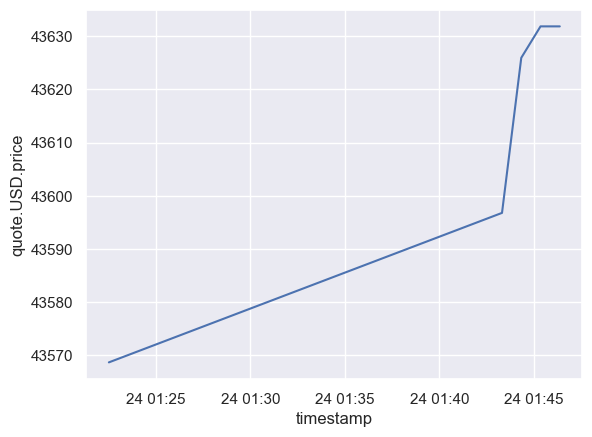

In [47]:
sns.set_theme(style = 'darkgrid')

sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df_9)